# **Cloud Classification For Weather Prediction using Deep learning**



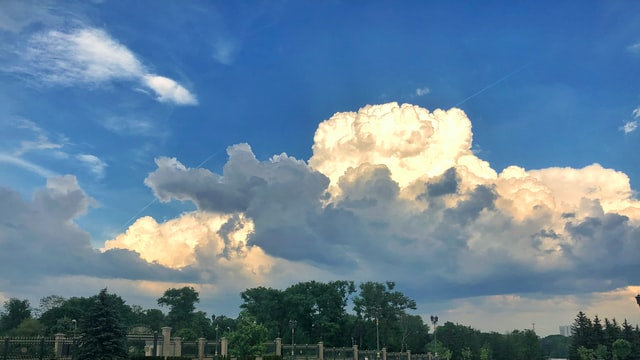




Time and again unfortunate accidents due to inclement weather conditions across the globe have surfaced. Plane crash , Ship collision, train derailment and car accidents are some of the tragic incidents that have been a part of the news in recent times. This grave problem of safety and security in adverse conditions has drawn the attention of the society and numerous studies have been done in past to expose the vulnerability of functioning of transportation services due to weather conditions.

With the advancement in technology and emergence of a new field, intelligent transportation, automated determination of weather condition has become more relevant. Present systems either rely on series of expensive sensors or human assistance to identify the weather conditions. 

Computer vision is a branch of computer science to recognize or classify images that can assist in classifying cloud images that do not depend on weather forecast information from the internet. ***This project aims to classify cloud images using deep learning, using a single image and to find out the type of weather***



This data has been collected from internet and the images of interest.Data set of 11 types of clouds.2047 training images, 248 test images.

In [3]:
pip install tensorflow  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **Installing the  libraries**

In [4]:
import tensorflow as tf

In [5]:
tf.__version__ # checking the version of tensorflow 

'2.8.2'

In [6]:
# importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import random #generating random samples
import cv2
import tqdm as tqdm
import os
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
import glob 
from skimage import io 
from skimage.color import rgb2gray
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

###**Setting up train and test directory path**

Training images are also numbered sequentially with "zeros" padding. For example 001.jpg, 002.jpg ….010.jpg, 011.jpg …..099.jpg, 100jpg, 102.jpg etc. The zero's padding preserves the file order when used with python file functions and Keras flow from directory.

test images are some random samples of each category of cloud.

In [7]:
# Importing and Loading the data into a data frame
train_dir = "/content/drive/MyDrive/capstone test for one type"
test_dir = "/content/drive/MyDrive/testfinal"

In [8]:
print("Train directory -->", os.listdir(train_dir))
print("Test directory -->", os.listdir(test_dir)[:10])

Train directory --> ['Ac', 'As', 'Cb', 'Cc', 'Ci', 'Cs', 'Ct', 'Cu', 'Ns', 'Sc', 'St']
Test directory --> ['Sc-N298.jpg', 'Sc-N300.jpg', 'Sc-N299.jpg', 'Sc-N289.jpg', 'Sc-N276.jpg', 'Sc-N288.jpg', 'Sc-N277.jpg', 'Sc-N291.jpg', 'Sc-N285.jpg', 'Sc-N286.jpg']


In [9]:
sample_paper = random.choice(os.listdir("/content/drive/MyDrive/capstone test for one type/"+ "As"))
image = load_img(train_dir + "/As/" + sample_paper)

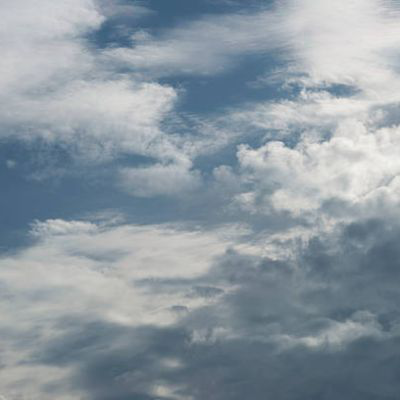

In [10]:
image


### **Distribution of Training dataset**



*The training set is not balanced, having a varying number of files per cloud type. However each type has at least 120 training image files.*

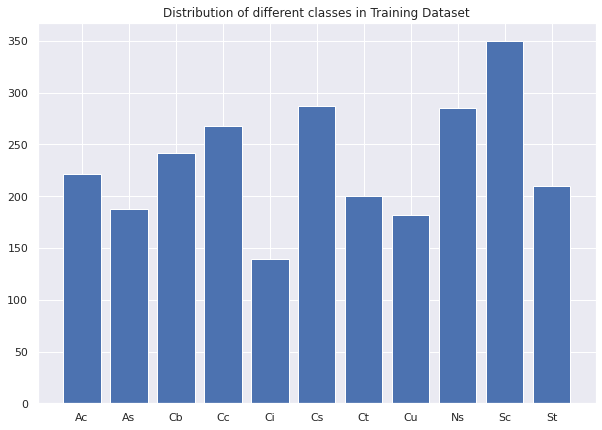

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder =['Ac', 'As', 'Cb', 'Cc', 'Ci', 'Cs', 'Ct', 'Cu', 'Ns', 'Sc', 'St']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/capstone test for one type/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(10,7))  
sns.set_theme(style="darkgrid")

plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

The labels of each class denotes the type of cloud which has its own property. for instances:

Ci = cirrus; Cs = cirrostratus; Cc = cirrocumulus; Ac = altocumulus; As = altostratus; Cu = cumulus; Cb = cumulonimbus; Ns = nimbostratus; Sc = stratocumulus; St = stratus; Ct = contrail

### **Random samples from dataset**

Let us see some samples from the dataset

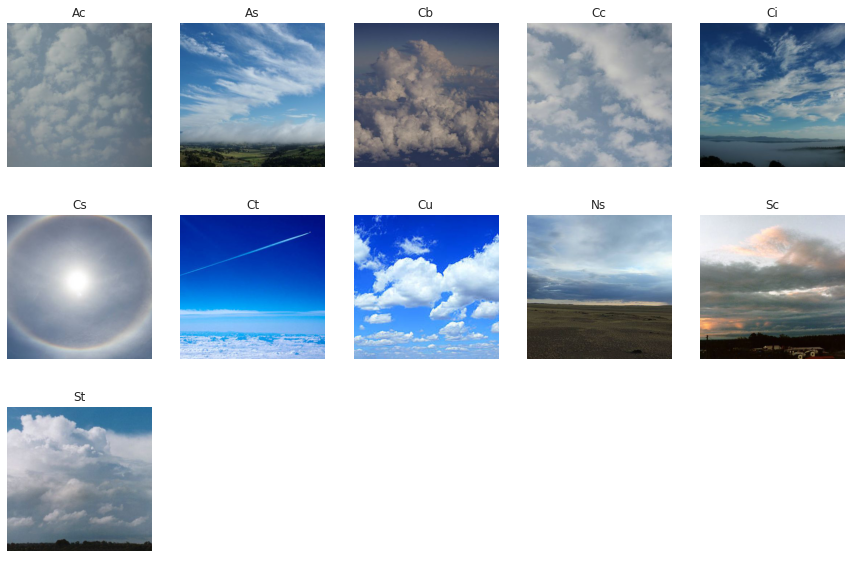

In [12]:
fig, ax = plt.subplots(3, 5, figsize=(15, 10))

sample_paper = random.choice(os.listdir("/content/drive/MyDrive/capstone test for one type/"+ "Ac"))
image = load_img(train_dir + "/Ac/" + sample_paper)
ax[0,0].imshow(image)
ax[0,0].set_title("Ac")
ax[0,0].axis("Off")

sample_paper = random.choice(os.listdir("/content/drive/MyDrive/capstone test for one type/"+ "As"))
image = load_img(train_dir + "/As/" + sample_paper)
ax[0,1].imshow(image)
ax[0,1].set_title("As")
ax[0,1].axis("Off")

sample_paper = random.choice(os.listdir("/content/drive/MyDrive/capstone test for one type/"+ "Cb"))
image = load_img(train_dir + "/Cb/" + sample_paper)
ax[0,2].imshow(image)
ax[0,2].set_title("Cb")
ax[0,2].axis("Off")

sample_paper = random.choice(os.listdir("/content/drive/MyDrive/capstone test for one type/"+ "Cc"))
image = load_img(train_dir + "/Cc/" + sample_paper)
ax[0,3].imshow(image)
ax[0,3].set_title("Cc")
ax[0,3].axis("Off")

sample_paper = random.choice(os.listdir("/content/drive/MyDrive/capstone test for one type/"+ "Ci"))
image = load_img(train_dir + "/Ci/" + sample_paper)
ax[0,4].imshow(image)
ax[0,4].set_title("Ci")
ax[0,4].axis("Off")


sample_paper = random.choice(os.listdir("/content/drive/MyDrive/capstone test for one type/"+ "Cs"))
image = load_img(train_dir + "/Cs/" + sample_paper)
ax[1,0].imshow(image)
ax[1,0].set_title("Cs")
ax[1,0].axis("Off")


sample_paper = random.choice(os.listdir("/content/drive/MyDrive/capstone test for one type/"+ "Ct"))
image = load_img(train_dir + "/Ct/" + sample_paper)
ax[1,1].imshow(image)
ax[1,1].set_title("Ct")
ax[1,1].axis("Off")

sample_paper = random.choice(os.listdir("/content/drive/MyDrive/capstone test for one type/"+ "Cu"))
image = load_img(train_dir + "/Cu/" + sample_paper)
ax[1,2].imshow(image)
ax[1,2].set_title("Cu")
ax[1,2].axis("Off")

sample_paper = random.choice(os.listdir("/content/drive/MyDrive/capstone test for one type/"+ "Ns"))
image = load_img(train_dir + "/Ns/" + sample_paper)
ax[1,3].imshow(image)
ax[1,3].set_title("Ns")
ax[1,3].axis("Off")

sample_paper = random.choice(os.listdir("/content/drive/MyDrive/capstone test for one type/"+ "Sc"))
image = load_img(train_dir + "/Sc/" + sample_paper)
ax[1,4].imshow(image)
ax[1,4].set_title("Sc")
ax[1,4].axis("Off")


sample_paper = random.choice(os.listdir("/content/drive/MyDrive/capstone test for one type/"+ "St"))
image = load_img(train_dir + "/St/" + sample_paper)
ax[2,0].imshow(image)
ax[2,0].set_title("St")
ax[2,0].axis("Off")


ax[2,1].axis("Off")
ax[2,2].axis("Off")
ax[2,3].axis("Off")
ax[2,4].axis("Off")


plt.show()



### **Distribution of Validation dataset**

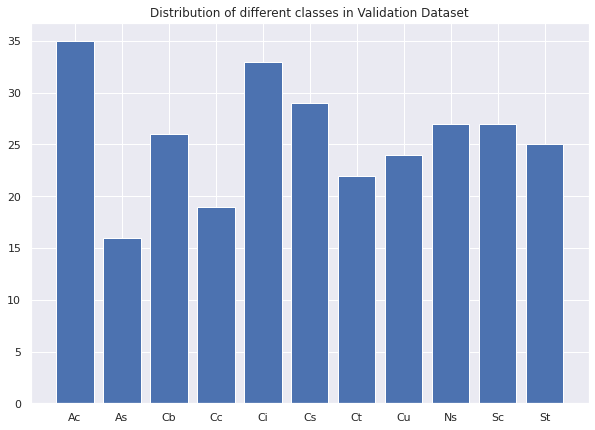

In [13]:

image_folder = ['Ac', 'As', 'Cb', 'Cc', 'Ci', 'Cs', 'Ct', 'Cu', 'Ns', 'Sc', 'St']
nimgs = {}
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/test_sample/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(10,7))  
sns.set_theme(style="darkgrid")
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()

### **Image preprocessing techniques**

Since images exist in different formats, i.e., natural, fake, grayscale, etc., we need to take into consideration and standardize them before feeding them into a neural network.

since the dataset has all the images of fixed resolution of **256×256 pixels** with the JPEG format.Let us set the default image height and width to be 256 and 256

In [14]:
img_width=256; img_height=256 
batch_size=16

###**Grayscale conversion**
Grayscale is simply converting images from colored to black and white. It is normally used to reduce computation complexity in machine learning algorithms.

Since most pictures don’t need color to be recognized, it is wise to use grayscale, which reduces the number of pixels in an image, thus, reducing the computations required.

In [15]:
image = imread('/content/drive/MyDrive/capstone test for one type/Ct/Ct-N003.jpg')  

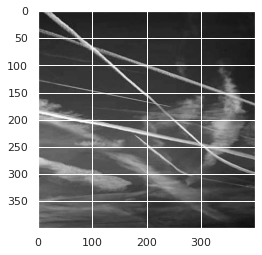

In [16]:
gray_image = rgb2gray(image)
plt.imshow(gray_image, cmap = 'gray')

## **Data augmentation**

Data augmentation is the process of making minor alterations to existing data to increase its diversity without collecting new data.

It is a technique used for enlarging a dataset. Standard data augmentation techniques include horizontal & vertical flipping, rotation, cropping, shearing, etc.Standard data augmentation techniques include horizontal & vertical flipping, rotation, cropping, shearing, etc.

In this model for training data, augmentation techniques such as rescaling, rotation,zoom_range and horizontal & vertical flip are done

In [17]:
from pylab import *

### **Horizontal and vertical flip**

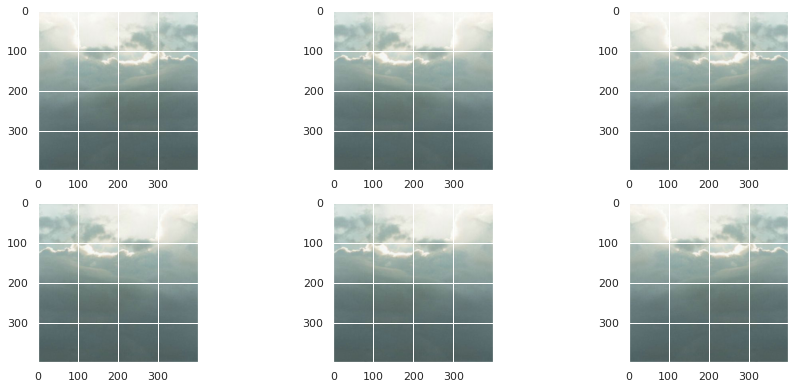

In [18]:
image = load_img('/content/drive/MyDrive/capstone test for one type/St/St-N013.jpg')
# we converting the image which is in PIL format into the numpy array, so that we can apply deep learning methods
dataImage = img_to_array(image)
# print(dataImage)
# expanding dimension of the load image
imageNew = expand_dims(dataImage, 0)
# print(imageNew)
# now here below we creating the object of the data augmentation class
imageDataGen = ImageDataGenerator(horizontal_flip=True)
# because as we alreay load image into the memory, so we are using flow() function, to apply transformation
iterator = imageDataGen.flow(imageNew, batch_size=1)
# below we generate augmented images and plotting for visualization
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
for i in range(6):
	# we are below define the subplot
	pyplot.subplot(330 + 1 + i)
	# generating images of each batch
	batch = iterator.next()
	# again we convert back to the unsigned integers value of the image for viewing
	image = batch[0].astype('uint8')
	# we plot here raw pixel data
	pyplot.imshow(image)
# visualize the the figure
pyplot.show()

### **Rotation**
This process involves rotating an image by a specified degree.

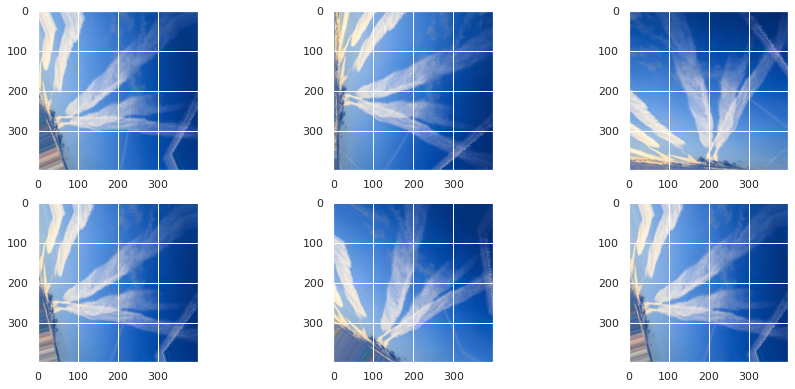

In [19]:
image = load_img('/content/drive/MyDrive/capstone test for one type/Ct/Ct-N009.jpg')
# we converting the image which is in PIL format into the numpy array, so that we can apply deep learning methods
dataImage = img_to_array(image)
# print(dataImage)
# expanding dimension of the load image
imageNew = expand_dims(dataImage, 0)
imageDataGen = ImageDataGenerator(rotation_range=90)
# because as we alreay load image into the memory, so we are using flow() function, to apply transformation
iterator = imageDataGen.flow(imageNew, batch_size=1)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
# below we generate augmented images and plotting for visualization
for i in range(6):
	# we are below define the subplot
	pyplot.subplot(330 + 1 + i)
	# generating images of each batch
	batch = iterator.next()
	# again we convert back to the unsigned integers value of the image for viewing
	image = batch[0].astype('uint8')
	# we plot here raw pixel data
	pyplot.imshow(image)
# visualize the the figure
pyplot.show()

In [20]:
TRAINING_DIR = '/content/drive/MyDrive/capstone test for one type'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True,vertical_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 2572 images belonging to 11 classes.


In [21]:
VALIDATION_DIR = '/content/drive/MyDrive/test_sample'

validation_datagen = ImageDataGenerator(rescale = 1/255.0,rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True,vertical_flip=True)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 283 images belonging to 11 classes.


### **Standardizing images**
Standardization  re-scales data to have a standard deviation of 1 (unit variance) and a mean of 0.

Standardization helps to improve the quality and consistency of data.

Here standardizing is performed on test data because they may have varying image sizes

In [22]:
datagen_test = ImageDataGenerator(rescale=1./255,
    featurewise_std_normalization=True,
    samplewise_std_normalization=True)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:349: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [23]:
TEST_DIR='/content/drive/MyDrive/testfinal/'
test_generator = datagen_test.flow_from_directory(
        TEST_DIR,
        target_size=(250, 250),
        batch_size=32,
        class_mode='categorical')

Found 0 images belonging to 0 classes.


Here callback is done that includes stopping training when we reach a certain accuracy/loss score, saving our model as a checkpoint after each successful epoch

In [24]:
callbacks = EarlyStopping(monitor='val_loss', patience=11, verbose=1, mode='auto')
# saving  best Model
best_model_file = '/content/CNN_aug_best_weights.h5'

best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Building the CNN model**

The CNN model composed of different layers such as:

1. Conv2D: The features will be "extracted" from the image.

2. MaxPooling2D: The images get half sized.

3. Flatten: Transforms the format of the images from a 2d-array 
to a 1d-array of 150 150 3 pixel values.

4. Relu : given a value x, returns max(x, 0).

5. Softmax: gives the probability that the image belongs to one of the classes.





In [ ]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(11, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 conv2d_31 (Conv2D)          (None, 58, 58, 64)       

Then, we can compile it with some parameters such as:

1. Optimizer: adam 

2. Loss function: we use sparse categorical crossentropy 

3. metrics: Accuracy

In [ ]:
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics =['accuracy'])

In [ ]:
history = model.fit_generator(train_generator,
                              epochs=85,
                              verbose=3,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/85
Epoch 2/85
Epoch 3/85
Epoch 4/85
Epoch 5/85
Epoch 6/85
Epoch 7/85
Epoch 8/85
Epoch 9/85
Epoch 10/85
Epoch 11/85
Epoch 12/85
Epoch 13/85
Epoch 14/85
Epoch 15/85
Epoch 16/85
Epoch 17/85
Epoch 18/85
Epoch 19/85
Epoch 20/85
Epoch 21/85
Epoch 22/85
Epoch 23/85
Epoch 24/85
Epoch 25/85
Epoch 26/85
Epoch 27/85
Epoch 28/85
Epoch 29/85
Epoch 30/85
Epoch 31/85
Epoch 32/85
Epoch 33/85
Epoch 34/85
Epoch 35/85
Epoch 36/85
Epoch 37/85
Epoch 38/85
Epoch 39/85
Epoch 40/85
Epoch 41/85
Epoch 42/85
Epoch 43/85
Epoch 44/85
Epoch 45/85
Epoch 46/85
Epoch 47/85
Epoch 48/85
Epoch 49/85
Epoch 50/85
Epoch 51/85
Epoch 52/85
Epoch 53/85
Epoch 54/85
Epoch 55/85
Epoch 56/85
Epoch 57/85
Epoch 58/85
Epoch 59/85
Epoch 60/85
Epoch 61/85
Epoch 62/85
Epoch 63/85
Epoch 64/85
Epoch 65/85
Epoch 66/85
Epoch 67/85
Epoch 68/85
Epoch 69/85
Epoch 70/85
Epoch 71/85
Epoch 72/85
Epoch 73/85
Epoch 74/85
Epoch 75/85
Epoch 76/85
Epoch 77/85
Epoch 78/85
Epoch 79/85
Epoch 80/85
Epoch 81/85
Epoch 82/85
Epoch 83/85
Epoch 84/85
E

In [ ]:
print("Accuracy of the model on train data is {:.2f}%".format(history.history["accuracy"][-1]*100))

Accuracy of the model on train data is 44.05%


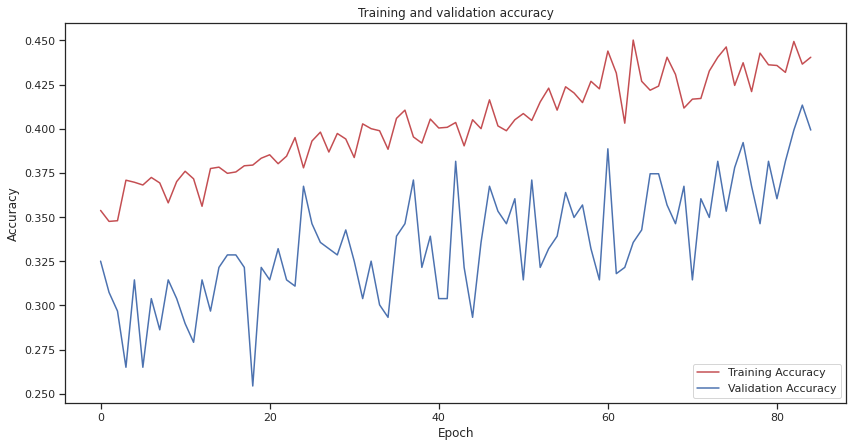

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
sns.set_style('ticks')
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

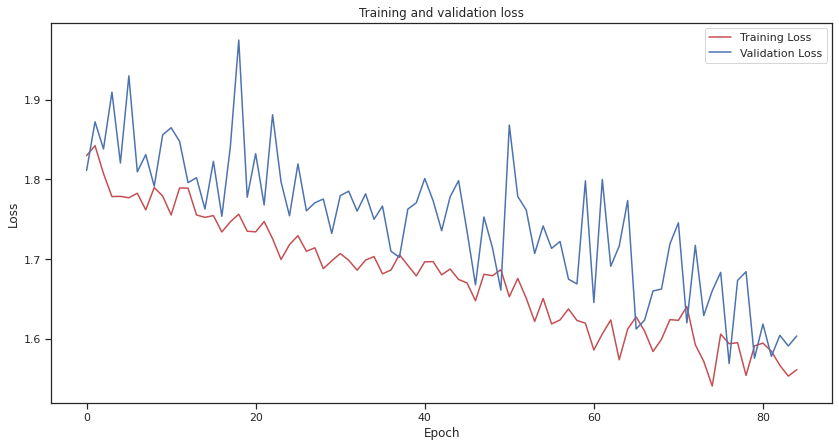

In [ ]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
sns.set_style('ticks')
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [ ]:
labels = (train_generator.class_indices)
labels = dict((v , k) for k , v in labels.items())
print(labels)

{0: 'Ac', 1: 'As', 2: 'Cb', 3: 'Cc', 4: 'Ci', 5: 'Cs', 6: 'Ct', 7: 'Cu', 8: 'Ns', 9: 'Sc', 10: 'St'}


In [ ]:
test_img = os.listdir(os.path.join("/content/drive/MyDrive/testfinal"))

test_df = pd.DataFrame({'Image': test_img}) 
test_df.head()

,Image
0,Sc-N298.jpg
1,Sc-N300.jpg
2,Sc-N299.jpg
3,Sc-N289.jpg
4,Sc-N276.jpg


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

In [ ]:
def prediction(test_path):
    img = image.load_img(test_path , target_size = (256, 256))
    img = image.img_to_array(img, dtype=np.uint8)
    img = np.array(img)/255.0

    plt.title('Cloud Image')
    plt.axis('off')
    plt.imshow(img.squeeze())

    predict = model.predict(img[np.newaxis , ...])
    predicted_class = labels[np.argmax(predict[0] , axis = -1)]

    print('Prediction Value: ' , np.max(predict[0] , axis = -1))
    
    print("Classified:",predicted_class)
    
    if predicted_class=='Ci':
        pclass='cirrus'
        print(' No precipitation,these clouds may herald the approach of a warm front')
    elif predicted_class=='Ct':
         pclass='contrail'
         print('Cloud Type: ', pclass)
         print(' short-lived contrail indicates low-humidity air at high altitude, a sign of fair weather, whereas a thick, long-lasting contrail reflects humid air and can be an early indicator of a storm.')
    elif predicted_class=='Cs':
         pclass='cirrostratus'    
         print('Cloud Type: ', pclass)
         print('These clouds are often the first visible indication of an approaching weather front, and may progressively thicken to altostratus and then nimbostratus with lowering of cloud base as the front approaches.')
         print('an indication of a nearing storm')
    elif predicted_class=='Cc':
         pclass='cirrocumulus'   
         print('Cloud Type: ', pclass)
         print('the changeable weather that follows.')
    elif predicted_class=='Ac':
         pclass='altocumulus' 
         print('Cloud Type: ', pclass)
         print('These have grayish-white rolls that look like cirrocumulus but are darker and sometimes appear in layers. If the wind is steady between northeast and south, these clouds promise rain soon.')
    elif predicted_class=='As':
         pclass='altostratus' 
         print('Cloud Type: ', pclass)
         print('Thicker, darker and more claustrophobic than the higher cirrostratus clouds, they promise rain soon.')
    elif predicted_class=='Cu':
         pclass='cumulus' 
         print('Cloud Type: ', pclass)
         print('Seen over land during the day indicates thermals and promises good sea breezes')
    elif predicted_class=='Cb':
         pclass='cumulonimbus'
         print('Cloud Type: ', pclass)
         print("Strong winds are possible")
    elif predicted_class=='Ns':
         pclass='nimbostratus'
         print('Cloud Type: ', pclass)
         print(' These clouds always hide the sun or moon, and normally produce continuous precipitation which is often moderate to heavy.')
    elif predicted_class=='Sc':
         pclass='stratocumulus'
         print('Cloud Type: ', pclass)
         print('foretell bad weather')
    elif predicted_class=='St':
         pclass='stratus'
         print('Cloud Type: ', pclass)
         print('These clouds combine in a dense gray overcast that promises light to heavy rain')
    

Prediction Value:  0.51014936
Classified: Sc
Cloud Type:  stratocumulus
foretell bad weather


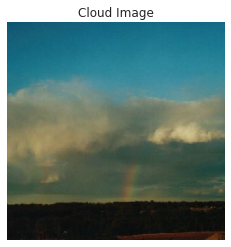

In [ ]:
#upload your image path here
test_path = r'/content/drive/MyDrive/testfinal/Sc-N277.jpg'
prediction(test_path)

# **Building ResNet50 model**

In [25]:
IMAGE_SIZE = [224, 224]

In [26]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential

In [27]:
resnet = ResNet50(
    input_shape = IMAGE_SIZE + [3], # Making the image into 3 Channel, so concating 3.
    weights = 'imagenet', # Default weights.
    include_top = False   # 
)


94781440/94765736 [==============================] - 0s 0us/step


In [28]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [29]:
for layer in resnet.layers:
    layer.trainable = False

In [30]:
from glob import glob

In [31]:
folders = glob(TRAINING_DIR  + '/*')
folders

['/content/drive/MyDrive/capstone test for one type/Ac',
 '/content/drive/MyDrive/capstone test for one type/As',
 '/content/drive/MyDrive/capstone test for one type/Cb',
 '/content/drive/MyDrive/capstone test for one type/Cc',
 '/content/drive/MyDrive/capstone test for one type/Ci',
 '/content/drive/MyDrive/capstone test for one type/Cs',
 '/content/drive/MyDrive/capstone test for one type/Ct',
 '/content/drive/MyDrive/capstone test for one type/Cu',
 '/content/drive/MyDrive/capstone test for one type/Ns',
 '/content/drive/MyDrive/capstone test for one type/Sc',
 '/content/drive/MyDrive/capstone test for one type/St']

In [32]:
cloud_label = ['Ac', 'As', 'Cb', 'Cc', 'Ci', 'Cs', 'Ct', 'Cu', 'Ns', 'Sc', 'St']

In [33]:
x = Flatten() (resnet.output)

In [34]:
prediction = Dense(len(folders), activation = 'softmax')(x)

In [35]:
from tensorflow.keras.models import Model

In [36]:
# Create a model Object

model = Model(inputs = resnet.input, outputs = prediction)

In [37]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [38]:
model.compile (
    loss = 'categorical_crossentropy',
    
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [39]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [40]:
training_set = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size = IMAGE_SIZE,
    batch_size = 32,
    class_mode = 'categorical' # As we have more than 2 so using categorical.. for 2 we might have used binary.
)

Found 2572 images belonging to 11 classes.


In [41]:
test_set = train_datagen.flow_from_directory(
    VALIDATION_DIR ,
    target_size = IMAGE_SIZE,
    batch_size = 32,
    class_mode = 'categorical'
)

Found 283 images belonging to 11 classes.


In [49]:
history = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 100,
    steps_per_epoch = 120,
    validation_steps = len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
120/120 [==============================] - 417s 3s/step - loss: 2.7348 - accuracy: 0.2570 - val_loss: 2.1726 - val_accuracy: 0.3039


In [50]:
print("Accuracy of the model on train data is {:.2f}%".format(history.history["accuracy"][-1]*100))

Accuracy of the model on train data is 25.70%


In [56]:
labels = (train_generator.class_indices)
labels = dict((v , k) for k , v in labels.items())
print(labels)

{0: 'Ac', 1: 'As', 2: 'Cb', 3: 'Cc', 4: 'Ci', 5: 'Cs', 6: 'Ct', 7: 'Cu', 8: 'Ns', 9: 'Sc', 10: 'St'}


In [68]:
def prediction(test_path):
    img = image.load_img(test_path , target_size = (224, 224))
    img = image.img_to_array(img, dtype=np.uint8)
    img = np.array(img)/255.0

    plt.title('Cloud Image')
    plt.axis('off')
    plt.imshow(img.squeeze())

    predict = model.predict(img[np.newaxis , ...])
    predicted_class = labels[np.argmax(predict[0] , axis = -1)]

    print('Prediction Value: ' ,np.max(predict[0] , axis = -1))
    
    print("Classified:",predicted_class)
    
    if predicted_class=='Ci':
        pclass='cirrus'
        print(' No precipitation,these clouds may herald the approach of a warm front')
    elif predicted_class=='Ct':
         pclass='contrail'
         print('Cloud Type: ', pclass)
         print(' short-lived contrail indicates low-humidity air at high altitude, a sign of fair weather, whereas a thick, long-lasting contrail reflects humid air and can be an early indicator of a storm.')
    elif predicted_class=='Cs':
         pclass='cirrostratus'    
         print('Cloud Type: ', pclass)
         print('These clouds are often the first visible indication of an approaching weather front, and may progressively thicken to altostratus and then nimbostratus with lowering of cloud base as the front approaches.')
         print('an indication of a nearing storm')
    elif predicted_class=='Cc':
         pclass='cirrocumulus'   
         print('Cloud Type: ', pclass)
         print('the changeable weather that follows.')
    elif predicted_class=='Ac':
         pclass='altocumulus' 
         print('Cloud Type: ', pclass)
         print('These have grayish-white rolls that look like cirrocumulus but are darker and sometimes appear in layers. If the wind is steady between northeast and south, these clouds promise rain soon.')
    elif predicted_class=='As':
         pclass='altostratus' 
         print('Cloud Type: ', pclass)
         print('Thicker, darker and more claustrophobic than the higher cirrostratus clouds, they promise rain soon.')
    elif predicted_class=='Cu':
         pclass='cumulus' 
         print('Cloud Type: ', pclass)
         print('Seen over land during the day indicates thermals and promises good sea breezes')
    elif predicted_class=='Cb':
         pclass='cumulonimbus'
         print('Cloud Type: ', pclass)
         print("Strong winds are possible")
    elif predicted_class=='Ns':
         pclass='nimbostratus'
         print('Cloud Type: ', pclass)
         print(' These clouds always hide the sun or moon, and normally produce continuous precipitation which is often moderate to heavy.')
    elif predicted_class=='Sc':
         pclass='stratocumulus'
         print('Cloud Type: ', pclass)
         print('foretell bad weather')
    elif predicted_class=='St':
         pclass='stratus'
         print('Cloud Type: ', pclass)
         print('These clouds combine in a dense gray overcast that promises light to heavy rain')

Prediction Value:  0.32074833
Classified: St
Cloud Type:  stratus
These clouds combine in a dense gray overcast that promises light to heavy rain


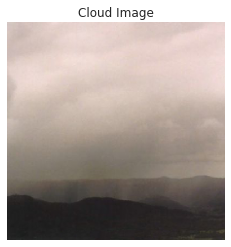

In [75]:
test_path = r'/content/drive/MyDrive/testfinal/St-N004.jpg'
prediction(test_path)